# Ntuple 1
Simple tree analysis.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Tuesday, November 21, 2017 at 09:40 AM.</small></i>

In [1]:
%%cpp -d
#include "TCanvas.h"
#include "TFile.h"
#include "TNtuple.h"
#include "TProfile.h"
#include "TBenchmark.h"
#include "TStyle.h"
#include "TPaveText.h"
#include "TFrame.h"
#include "TF1.h"
#include "TROOT.h"
#include "TSystem.h"
#include "TInterpreter.h"

Just in case this script is executed multiple times

In [2]:
delete gROOT->GetListOfFiles()->FindObject("hsimple.root");
delete gROOT->GetListOfCanvases()->FindObject("c1");

gBenchmark->Start("ntuple1");

 Connect ROOT histogram/ntuple demonstration file
 generated by example $ROOTSYS/tutorials/hsimple.C.

In [3]:
TString dir = gROOT->GetTutorialDir();
dir.Append("/hsimple.C");
dir.ReplaceAll("/./","/");
if (gBenchmark->GetBench("hsimple") < 0) gInterpreter->LoadMacro(dir.Data());
TFile *f1 = (TFile*)gROOT->ProcessLineFast("hsimple(1)");
if (!f1) return;

 Create a canvas, with 4 pads

In [4]:
TCanvas *c1 = new TCanvas("c1","The Ntuple canvas",200,10,700,780);
TPad *pad1 = new TPad("pad1","This is pad1",0.02,0.52,0.48,0.98,21);
TPad *pad2 = new TPad("pad2","This is pad2",0.52,0.52,0.98,0.98,21);
TPad *pad3 = new TPad("pad3","This is pad3",0.02,0.02,0.48,0.48,21);
TPad *pad4 = new TPad("pad4","This is pad4",0.52,0.02,0.98,0.48,1);
pad1->Draw();
pad2->Draw();
pad3->Draw();
pad4->Draw();

 Change default style for the statistics box

In [5]:
gStyle->SetStatW(0.30);
gStyle->SetStatH(0.20);

 Display a function of one ntuple column imposing a condition
 on another column.

In [6]:
pad1->cd();
pad1->SetGrid();
pad1->SetLogy();
TNtuple *ntuple = (TNtuple*)f1->Get("ntuple");
ntuple->SetLineColor(1);
ntuple->SetFillStyle(1001);
ntuple->SetFillColor(45);
ntuple->Draw("3*px+2","px**2+py**2>1");
ntuple->SetFillColor(38);
ntuple->Draw("2*px+2","pz>2","same");
ntuple->SetFillColor(5);
ntuple->Draw("1.3*px+2","(px^2+py^2>4) && py>0","same");
pad1->RedrawAxis();

 Display the profile of two columns
 The profile histogram produced is saved in the current directory with
 the name hprofs

In [7]:
pad2->cd();
pad2->SetGrid();
ntuple->Draw("pz:px>>hprofs","","goffprofs");
TProfile *hprofs = (TProfile*)gDirectory->Get("hprofs");
hprofs->SetMarkerColor(5);
hprofs->SetMarkerSize(0.7);
hprofs->SetMarkerStyle(21);
hprofs->Fit("pol2");


****************************************
Minimizer is Linear
Chi2                      =      16.5378
NDf                       =           68
p0                        =      1.04821   +/-   0.226552    
p1                        =    0.0133784   +/-   0.0420448   
p2                        =     0.956034   +/-   0.0245116   


Get pointer to fitted function and modify its attributes

In [8]:
TF1 *fpol2 = hprofs->GetFunction("pol2");
fpol2->SetLineWidth(4);
fpol2->SetLineColor(2);

 Display a scatter plot of two columns with a selection.
 Superimpose the result of another cut with a different marker color

In [9]:
pad3->cd();
pad3->GetFrame()->SetBorderSize(8);
ntuple->SetMarkerColor(1);
ntuple->Draw("py:px","pz>1");
ntuple->SetMarkerColor(2);
ntuple->Draw("py:px","pz<1","same");

 Display a 3-D scatter plot of 3 columns. Superimpose a different selection.

In [10]:
pad4->cd();
ntuple->Draw("pz:py:px","(pz<10 && pz>6)+(pz<4 && pz>3)");
ntuple->SetMarkerColor(4);
ntuple->Draw("pz:py:px","pz<6 && pz>4","same");
ntuple->SetMarkerColor(5);
ntuple->Draw("pz:py:px","pz<4 && pz>3","same");
TPaveText *l4 = new TPaveText(-0.9,0.5,0.9,0.95);
l4->SetFillColor(42);
l4->SetTextAlign(12);
l4->AddText("You can interactively rotate this view in 2 ways:");
l4->AddText("  - With the RotateCube in clicking in this pad");
l4->AddText("  - Selecting View with x3d in the View menu");
l4->Draw();

In [11]:
c1->cd();
c1->Update();
gStyle->SetStatColor(19);
gBenchmark->Show("ntuple1");

ntuple1   : Real Time =   1.62 seconds Cpu Time =   0.90 seconds


Draw all canvases 

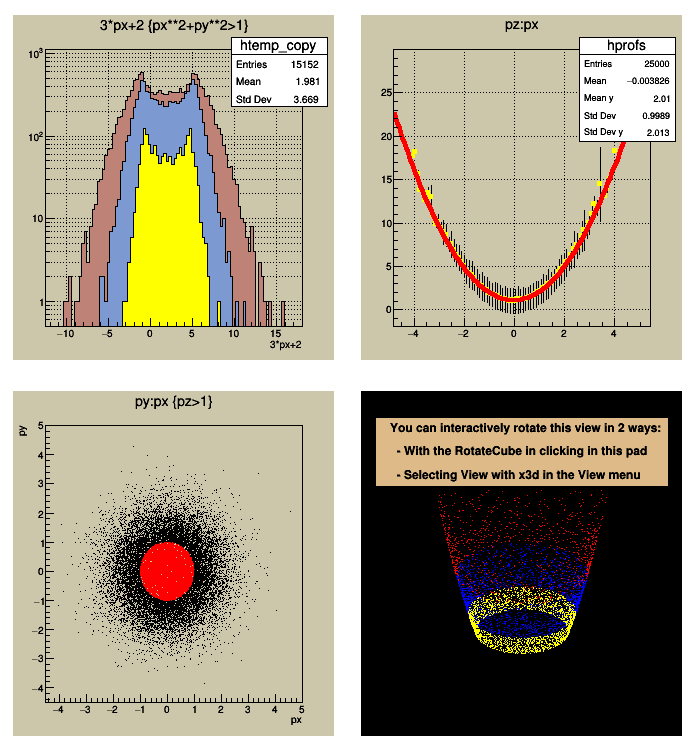

In [12]:
gROOT->GetListOfCanvases()->Draw()